In [52]:
using Pkg
using Optim
using PyPlot
using LinearAlgebra
using FFTW

In [89]:
function update_beliefs(p,g)
    l = length(p)
    result = zeros(l)
    result[1] = g(p[1])
    for i = 2:l
        result[i] = g(p[i])./g(p[i-1])
    end
    return result[:]
end


f1(p) = clamp(p,1e-8, 1)
update_beliefs([1,1,1],f1)

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

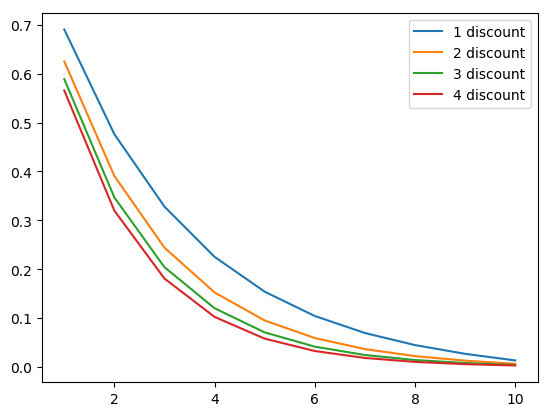

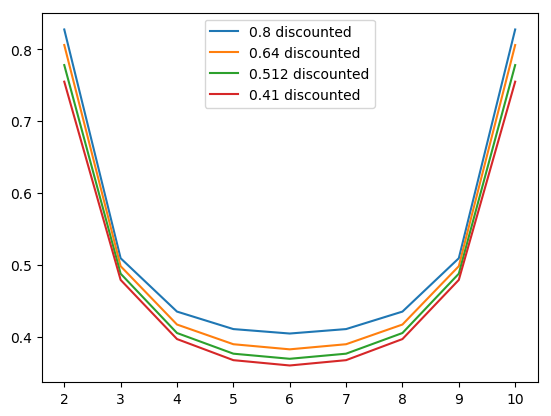

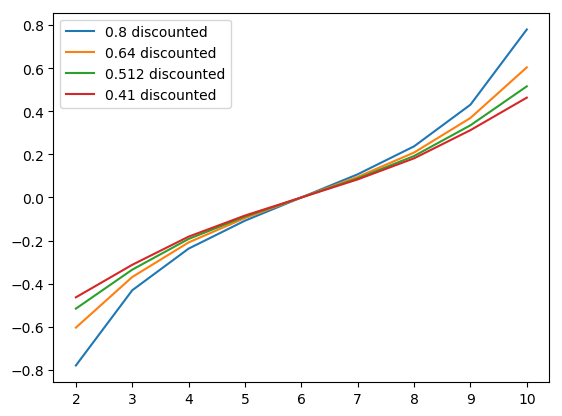

In [90]:
function create_plot(n,l,u,g,beta)
    p0 = ones(n) - (1/n*collect(1:n)) .+ 1e-2
    xs = collect( 1:length(p0) )
    
    for i=1:l
        delta = beta^i
        obj(p) = -1*sum((delta*ones(length(p))).^collect(1:length(p)) .*u1(p,g))
        res = optimize(obj,p0)
        ps = res.minimizer
        xs = collect( 1:length(ps) )
        figure(1)
        plot(xs, ps, label="$(i) discount")
        
        trans =  fft(ps)
        figure(2)
        plot(xs[2:end], real.(trans[2:end]), label="$(round(beta^i,digits=3)) discounted")
        
        figure(3)
        plot(xs[2:end], imag.(trans[2:end]), label="$(round(beta^i,digits=3)) discounted")
    end
    
    figure(1)
    legend()
    show()
    savefig("results2.png")
    
    figure(2)
    legend()
    show()
    savefig("results2.png")
    
    figure(3)
    legend()
    show()
    savefig("results2.png")
end

BETA = .8



u1(p,g) = p.*(ones(size(p)) - update_beliefs(p,g))

create_plot(10,4,u1,f1,BETA)
